# Задача №1

**Условия задачи №1**

За февраль на площадке ВК маркетологи потратили 14 399 806 р.
Необходимо собрать данные о тратах и количестве заявок в каждом из перечисленных городов, также подвести итог по всем городам.

Примите во внимание, что заявка в каждом городе стоит одинаково.

*Док “Вводные данные”

Дата: февраль, источник: ВК.

Произведём загрузку необходимых библиотек.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Уберём лимит на отображение строк.

In [2]:
pd.set_option('display.max_rows', None)

Загрузим данные.

In [3]:
input_data = pd.read_excel(r'C:\Users\Egor\Desktop\тест\Вводные данные.xlsx', parse_dates=True)

In [4]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39610 entries, 0 to 39609
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Основной контакт       39610 non-null  object 
 1   Дата создания          39610 non-null  object 
 2   Источник               39610 non-null  object 
 3   Город                  39610 non-null  object 
 4   Возраст                8779 non-null   object 
 5   Статус                 46 non-null     object 
 6   Придет                 7 non-null      float64
 7   LeadFormId             39563 non-null  float64
 8   Был записан            1025 non-null   object 
 9   Была первичная запись  1025 non-null   float64
 10  Придет.1               424 non-null    float64
 11  ХЗМ                    0 non-null      float64
 12  Онлайн-консультация    264 non-null    float64
dtypes: float64(6), object(7)
memory usage: 3.9+ MB


In [5]:
input_data.head()

,Основной контакт,Дата создания,Источник,Город,Возраст,Статус,Придет,LeadFormId,Был записан,Была первичная запись,Придет.1,ХЗМ,Онлайн-консультация
0,Эмиль,31.03.2023 23:38:35,tg,Другой,18,NaN,NaN,26.0,03.04.2023,1.0,NaN,NaN,1.0
1,Константин,31.03.2023 23:34:54,tg,Москва,18,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN
2,Ренат,31.03.2023 23:33:33,tg,Казань,18,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN
3,Даниил,31.03.2023 23:23:00,tg,Другой,15,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN
4,Alex Takizawa,31.03.2023 23:22:06,tg,Москва,19,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN


In [6]:
input_data.isna().sum()

Основной контакт             0
Дата создания                0
Источник                     0
Город                        0
Возраст                  30831
Статус                   39564
Придет                   39603
LeadFormId                  47
Был записан              38585
Была первичная запись    38585
Придет.1                 39186
ХЗМ                      39610
Онлайн-консультация      39346
dtype: int64

Пропусков в столбцах для условия задачи нет.

In [7]:
TOTAL = 14399806

In [8]:
input_data['Дата создания'] = pd.to_datetime(input_data['Дата создания'], format='%d.%m.%Y %H:%M:%S')

Отфильтруем значения согласно условию.

In [9]:
df = input_data[(input_data['Дата создания'].dt.month == 2) & (input_data['Источник'] == 'vk')]
df.head()

,Основной контакт,Дата создания,Источник,Город,Возраст,Статус,Придет,LeadFormId,Был записан,Была первичная запись,Придет.1,ХЗМ,Онлайн-консультация
12781,Влад,2023-02-28 23:47:37,vk,Другой,NaN,NaN,NaN,125.0,NaN,NaN,NaN,NaN,NaN
12782,Алексей,2023-02-28 23:37:06,vk,Иваново,NaN,NaN,NaN,125.0,NaN,NaN,NaN,NaN,NaN
12784,Xiro,2023-02-28 23:14:17,vk,Другой,NaN,NaN,NaN,125.0,NaN,NaN,NaN,NaN,NaN
12791,Никита,2023-02-28 22:17:46,vk,Петрозаводск,NaN,NaN,NaN,125.0,NaN,NaN,NaN,NaN,NaN
12794,Aaron,2023-02-28 21:53:23,vk,Красноярск,NaN,NaN,NaN,125.0,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape

(21711, 13)

В таблице осталось 21711 удовлетворяющих условию записей.

Рассчитаем расход на одну заявку.

In [11]:
one_entry = TOTAL / df.shape[0]
one_entry

663.2493206208834

Посмотрим на статистику по городам.

In [12]:
pd.options.display.max_rows = 100

In [13]:
table = pd.DataFrame(
    pd.pivot_table(df, values='Основной контакт', index='Город',aggfunc='count') \
    .rename(columns={'Основной контакт':'Количество заявок'})
)

In [14]:
table['Расходы'] = round(table['Количество заявок'] * one_entry, 2)

In [15]:
table.sort_values(by=['Расходы'], ascending=False)

,Количество заявок,Расходы
Город,,
Другой,11631,7714252.85
Москва,2159,1431955.28
Санкт-Петербург,702,465601.02
Новосибирск,301,199638.05
Екатеринбург,265,175761.07
Краснодар,251,166475.58
Челябинск,219,145251.60
Самара,215,142598.60
Уфа,215,142598.60


# Задача №2

**Условие задачи №2** 

При попадании заявки в нашу CRM систему ей присваивается соответствующая воронка.  
Для повышения конверсии в договор была проведена рассылка, после которой заявки распределились на другие воронки.  
Чтобы оценить эффективность, нужно сравнить данные и у каждой заявки проставить новую воронку, если такая имеется.  
Воронка должна быть проставлена формулой, а не значением.  
Уникальное и неизменное значение для каждой заявки является ID.

*Док “Рассылка”

In [16]:
xls = pd.ExcelFile(r'C:\Users\Egor\Desktop\тест\Рассылка.xlsx')
df1 = pd.read_excel(xls, 'База для рассылки')
df2 = pd.read_excel(xls, 'Получили рассылку')

In [17]:
df1.shape, df2.shape

((1047, 7), (935, 6))

Размеры таблиц отличаются, следовательно рассылка была выполнена не для всех клиентов.

In [18]:
df1.head()

,ID,Основной контакт,Старая воронка,Новая воронка,Дата создания,Город,Возраст
0,32693772,Black,ДРР-скорозвон,NaN,06.04.2023 23:45:19,Хабаровск,18.0
1,32693770,Вячеслав,ДРР-скорозвон,NaN,06.04.2023 23:33:57,Пермь,19.0
2,32693768,Роман,ДРР-скорозвон,NaN,06.04.2023 23:30:35,Екатеринбург,18.0
3,32693766,Виталий,ДИСТ-скорозвон,NaN,06.04.2023 23:26:23,Другой,18.0
4,32693764,Миша,СкорингКЦ,NaN,06.04.2023 23:25:38,Другой,NaN


In [19]:
df2.head()

,ID,Основной контакт,Воронка,Дата создания,Город,Возраст
0,32684428,马特维耶夫,Дистанция,04.04.2023 08:50:48,Челябинск,16.0
1,32689917,帕夫鲁沙,ДРР-скорозвон,05.04.2023 01:44:38,Москва,19.0
2,32681834,安德鲁,ДРР-скорозвон,03.04.2023 12:40:52,Другой,NaN
3,32691982,كيف,ДРР-скорозвон,06.04.2023 03:38:08,Улан-Удэ,19.0
4,32685040,فلاديمير,Офис,04.04.2023 12:14:11,Другой,NaN


Избавимся от лишнего столбца `Новая воронка` с пропущенными значениями.

In [20]:
df1.drop('Новая воронка', axis=1, inplace=True)

Присоединим таблицу df2 к таблице df1 по полю ID.

In [21]:
new_df = df1.merge(df2[['ID', 'Воронка']], on='ID', how='left')
new_df.rename(columns={'Воронка': 'Новая воронка'}, inplace=True)
new_df = new_df[['ID', 'Основной контакт', 'Старая воронка', 'Новая воронка', 'Дата создания', 'Город', 'Возраст']]

In [22]:
pd.set_option('display.max_rows', None)

In [23]:
new_df

,ID,Основной контакт,Старая воронка,Новая воронка,Дата создания,Город,Возраст
0,32693772,Black,ДРР-скорозвон,ДИСТ-скорозвон,06.04.2023 23:45:19,Хабаровск,1.800000e+01
1,32693770,Вячеслав,ДРР-скорозвон,ДРР-скорозвон,06.04.2023 23:33:57,Пермь,1.900000e+01
2,32693768,Роман,ДРР-скорозвон,Офис,06.04.2023 23:30:35,Екатеринбург,1.800000e+01
3,32693766,Виталий,ДИСТ-скорозвон,Офис,06.04.2023 23:26:23,Другой,1.800000e+01
4,32693764,Миша,СкорингКЦ,ДРР-скорозвон,06.04.2023 23:25:38,Другой,NaN
5,32693762,Алик,Проект Карусель,Офис,06.04.2023 23:24:48,Тула,2.200000e+01
6,32693760,Константин,Проект Карусель,Офис,06.04.2023 23:24:34,Самара,1.800000e+01
7,32693758,Артём,СкорингКЦ,Дистанция,06.04.2023 23:24:06,Другой,NaN
8,32693756,Костя,СкорингКЦ,Офис,06.04.2023 23:22:09,Другой,NaN
9,32693752,Кирилл,ДРР-скорозвон,ДРР-скорозвон,06.04.2023 23:21:33,Тюмень,1.900000e+01


В Excel данная задача реашется с помощью функции ВПР.

# Задача №3

**Условие задачи №3** 

По таблице необходимо построить годовой итоговый отчет, из которого было бы наглядно видно, сколько мы потратили на каждое направление, сколько квалифицированных заявок и договоров нам это принесло.

*Док “Таблица”

In [24]:
data = pd.read_excel(r'C:\Users\Egor\Desktop\тест\Таблица.xlsx', parse_dates=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Направление        64 non-null     object 
 1   Месяц              64 non-null     object 
 2   Расходы            64 non-null     float64
 3   Валовые заявки     64 non-null     int64  
 4   CPL валовые        64 non-null     float64
 5   Qualify            64 non-null     int64  
 6   CPA Qualify        64 non-null     float64
 7   CR% вал - Qualify  64 non-null     float64
 8   Договоры           64 non-null     int64  
 9   CPO                60 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 5.1+ KB


In [26]:
data.head()

,Направление,Месяц,Расходы,Валовые заявки,CPL валовые,Qualify,CPA Qualify,CR% вал - Qualify,Договоры,CPO
0,VK Freebilet,Январь,7031646.0,4266,1648.299578,2004,3508.805389,0.469761,93,75609.096774
1,Посев Freebilet,Январь,971091.0,855,1135.778947,502,1934.444223,0.587135,19,51110.052632
2,VK Metoda,Январь,464346.0,442,1050.556561,229,2027.711790,0.518100,0,NaN
3,VK Metoda 26+,Январь,165122.0,563,293.289520,307,537.856678,0.545293,0,NaN
4,Посев Metoda,Январь,1313312.0,3718,353.230769,1942,676.267765,0.522324,9,145923.555556


## Расходы по направлениям

In [27]:
table = pd.DataFrame(
    pd.pivot_table(data, values='Расходы', index='Направление',aggfunc='sum') \
    .rename(columns={'Расходы':'Суммарные расходы'})
    .sort_values(by='Суммарные расходы',ascending=False)
)

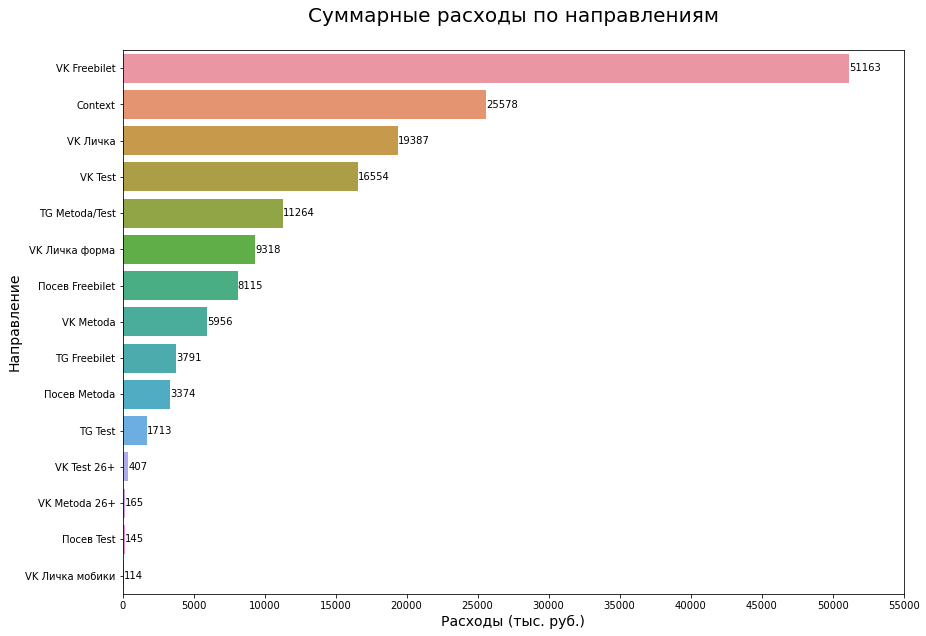

In [28]:
fig, ax = plt.subplots(figsize=(14, 10))

sns.barplot(x=table['Суммарные расходы'] / 1000, y=table.index, data=table)

plt.xlabel('Расходы (тыс. руб.)', size=14)
plt.ylabel('Направление', size=14)
plt.title('Суммарные расходы по направлениям'+'\n', size=20)
plt.xticks(np.arange(0, 60000, 5000))

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f')
    
plt.show()

## Количество квалифицированных заявок

In [29]:
table = pd.DataFrame(
    pd.pivot_table(data, values='Qualify', index='Направление',aggfunc='sum') \
    .rename(columns={'Qualify':'Количество заявок'})
    .sort_values(by='Количество заявок',ascending=False)
)

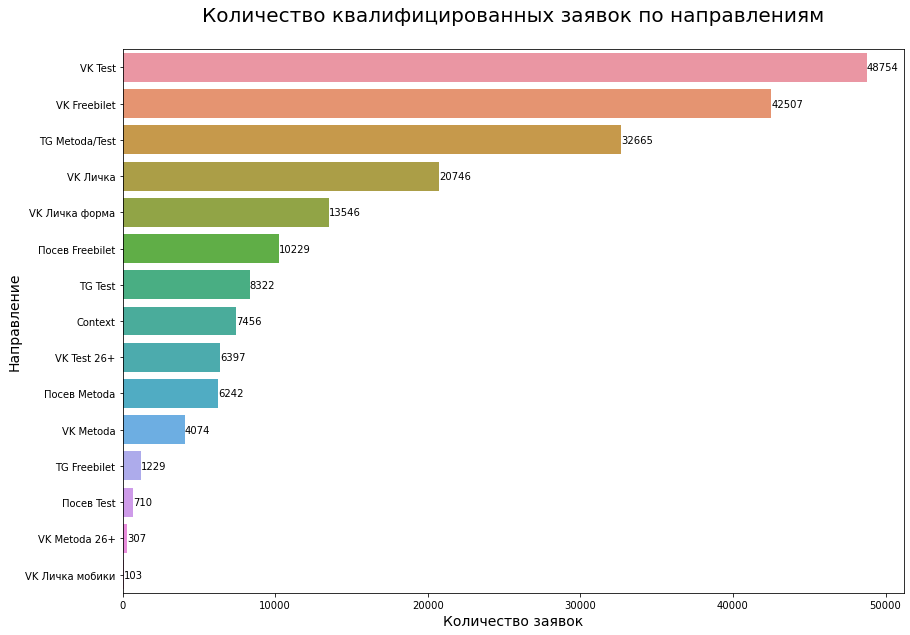

In [30]:
fig, ax = plt.subplots(figsize=(14, 10))

sns.barplot(x='Количество заявок', y=table.index, data=table)

plt.xlabel('Количество заявок', size=14)
plt.ylabel('Направление', size=14)
plt.title('Количество квалифицированных заявок по направлениям'+'\n', size=20)

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f')
    
plt.show()

## Количество договоров

In [31]:
table = pd.DataFrame(
    pd.pivot_table(data, values='Договоры', index='Направление',aggfunc='sum') \
    .rename(columns={'Договоры':'Количество договоров'})
    .sort_values(by='Количество договоров',ascending=False)
)

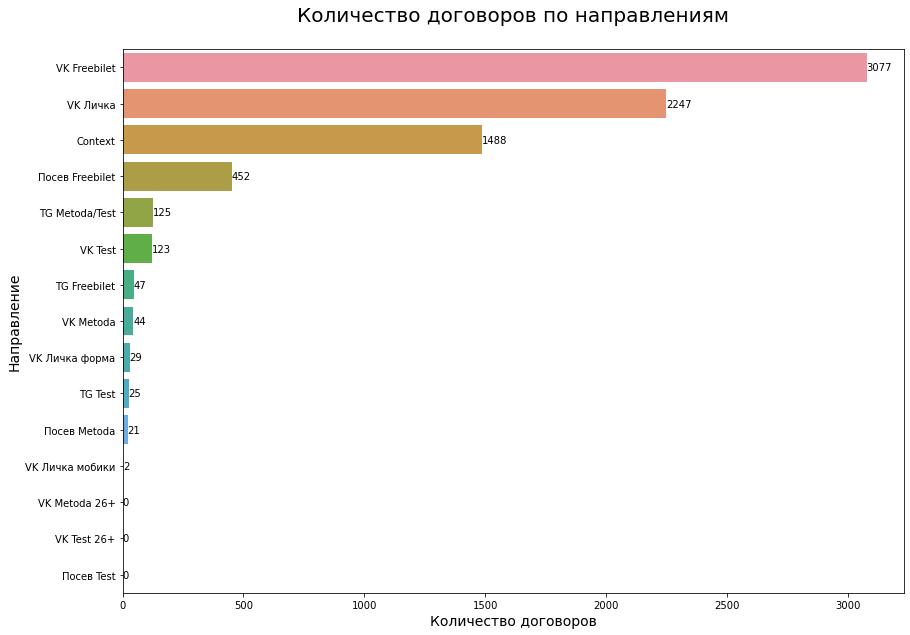

In [32]:
fig, ax = plt.subplots(figsize=(14, 10))

sns.barplot(x='Количество договоров', y=table.index, data=table)

plt.xlabel('Количество договоров', size=14)
plt.ylabel('Направление', size=14)
plt.title('Количество договоров по направлениям'+'\n', size=20)

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f')
    
plt.show()

Стоит отметить отсутствие договоров по направлениям: VK Metoda 26+, VK Test 26+, Посев Test.

## Расход на один договор

In [33]:
table = pd.DataFrame(
    pd.pivot_table(data, values='CPO', index='Направление',aggfunc='mean') \
    .rename(columns={'CPO':'Расход на договор'})
    .sort_values(by='Расход на договор',ascending=False)
)

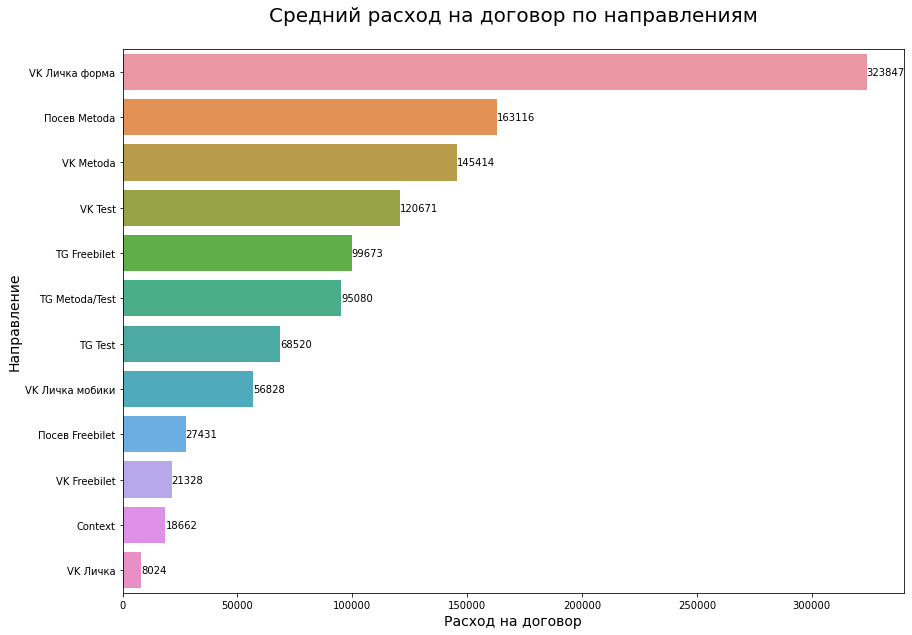

In [34]:
fig, ax = plt.subplots(figsize=(14, 10))

p = sns.barplot(x='Расход на договор', y=table.index, data=table)

plt.xlabel('Расход на договор', size=14)
plt.ylabel('Направление', size=14)
plt.title('Средний расход на договор по направлениям'+'\n', size=20)

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f')
 
plt.show()

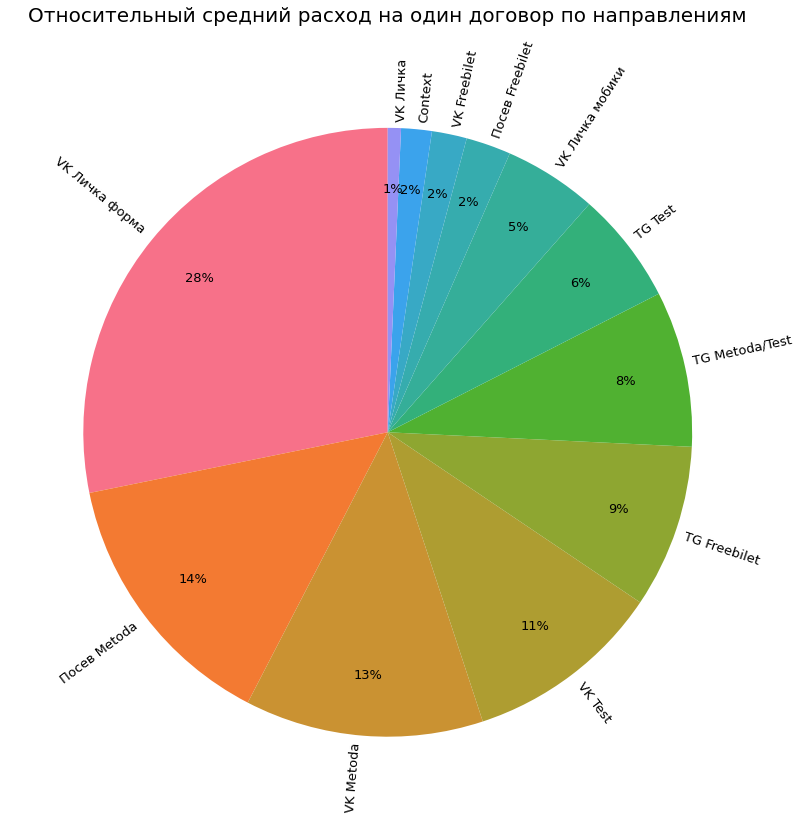

In [35]:
fig, ax = plt.subplots(figsize=(14, 14))

colors = sns.color_palette("husl", 15)

plt.pie(table['Расход на договор'], 
        labels=table.index, 
        colors=colors, 
        autopct=('%.0f%%'), 
        labeldistance=1.02, 
        startangle=90,
        pctdistance=0.8,
        textprops={'fontsize': 13},
        rotatelabels=True
        )

plt.title('Относительный средний расход на один договор по направлениям', pad=30, size=20)
plt.show()